<h1> The Open Power System Data (OPSD) Data Set  </h1>

In [1]:
from pathlib import Path
import sys

# If this notebook lives in <repo>/notebooks/, add the repo root to sys.path
PROJECT_ROOT = Path.cwd().parent  # .. from notebooks/ to repo root
sys.path.insert(0, str(PROJECT_ROOT))

# sanity check (optional)
print("Using PROJECT_ROOT:", PROJECT_ROOT)
print("Has src? ", (PROJECT_ROOT / "src").exists())


Using PROJECT_ROOT: c:\Users\flosk\Documents\GitHub\electricity-demand-project
Has src?  True


<h2> Download the Hourly Time Series </h2>

The open data platform [OPSD](https://open-power-system-data.org/) provides time series at different temporal resolutions. The following cell ownloads the hourly time series.

In [2]:
from pathlib import Path
import sys, importlib
import pandas as pd

# Make repo importable and load config
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import src.config as cfg
cfg = importlib.reload(cfg)

OPSD_60min_df = None
URL = "https://data.open-power-system-data.org/time_series/2020-10-06/time_series_60min_singleindex.csv"

if cfg.OPSD_60min_CSV.exists():
    OPSD_60min_df = pd.read_csv(cfg.OPSD_60min_CSV)
    print("(Re-)loaded hourly OPSD dataset into OPSD_60min_df.")
else:
    print('Not found: "OPSD_time_series_60min_singleindex.csv" in data/raw/.')
    print("Attempting to download from:", URL)
    try:
        from urllib.request import urlopen
        with urlopen(URL) as r, open(cfg.OPSD_60min_CSV, "wb") as f:
            f.write(r.read())
        OPSD_60min_df = pd.read_csv(cfg.OPSD_60min_CSV)
        print("Successfully downloaded and loaded the hourly OPSD dataset into OPSD_60min_df.")
    except Exception as e:
        print("Unfortunately, the download failed.")
        print("Reason:", repr(e))
        print("Please, try to download it manually, and place it at:", cfg.OPSD_60min_CSV)


(Re-)loaded hourly OPSD dataset into OPSD_60min_df.


The `.info()` and `.shape` output: 

In [3]:
print("   .info():") 
print(OPSD_60min_df.info())
print("   .shape:")
print(OPSD_60min_df.shape)

   .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Columns: 300 entries, utc_timestamp to UA_load_forecast_entsoe_transparency
dtypes: float64(298), object(2)
memory usage: 115.4+ MB
None
   .shape:
(50401, 300)


The first ten rows:

In [4]:
OPSD_60min_df.head(10)

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
5,2015-01-01T04:00:00Z,2015-01-01T05:00:00+0100,5309.0,6609.0,35.0,NaN,64.0,8487.0,8806.0,NaN,...,998.67,824.0,NaN,1.60,2626.0,2790.0,3.8,NaN,NaN,NaN
6,2015-01-01T05:00:00Z,2015-01-01T06:00:00+0100,5574.0,6543.0,35.0,NaN,84.0,8428.0,8805.0,NaN,...,1045.17,886.0,NaN,0.00,2641.0,2830.0,3.8,NaN,NaN,NaN
7,2015-01-01T06:00:00Z,2015-01-01T07:00:00+0100,5925.0,6851.0,36.0,NaN,131.0,8122.0,8651.0,NaN,...,1085.06,985.0,NaN,0.00,2622.0,2790.0,3.8,NaN,NaN,NaN
8,2015-01-01T07:00:00Z,2015-01-01T08:00:00+0100,6343.0,7061.0,36.0,2.0,109.0,8179.0,8674.0,NaN,...,1142.36,1109.0,NaN,0.00,2691.0,2980.0,3.9,NaN,NaN,NaN
9,2015-01-01T08:00:00Z,2015-01-01T09:00:00+0100,6882.0,7233.0,41.0,10.0,146.0,8340.0,9037.0,92.66,...,1206.03,1209.0,4.97,0.00,2794.0,3070.0,8.0,NaN,NaN,NaN


In [5]:
print(OPSD_60min_df[["cet_cest_timestamp", "utc_timestamp"]].head(3))
print(OPSD_60min_df[["cet_cest_timestamp", "utc_timestamp"]].tail(3))

         cet_cest_timestamp         utc_timestamp
0  2015-01-01T00:00:00+0100  2014-12-31T23:00:00Z
1  2015-01-01T01:00:00+0100  2015-01-01T00:00:00Z
2  2015-01-01T02:00:00+0100  2015-01-01T01:00:00Z
             cet_cest_timestamp         utc_timestamp
50398  2020-09-30T23:00:00+0200  2020-09-30T21:00:00Z
50399  2020-10-01T00:00:00+0200  2020-09-30T22:00:00Z
50400  2020-10-01T01:00:00+0200  2020-09-30T23:00:00Z


In summary, a first look at the data set shows: The data ranges from **2015-01-01** to **2020-10-01**. Stepwidth: one hour.  That adds up to $50 401$ rows, with data features comprising $300$ columns.  
We have two  **timestamp** columns, namely `utc_timestamp` and `cet_cest_timestamp`, currently of the `object` data type. We convert to `datetime`.  


In [ ]:
# Ensure both timestamp columns are parsed correctly
OPSD_60min_df['utc_timestamp'] = pd.to_datetime(OPSD_60min_df['utc_timestamp'], utc=True)
# For 'cet_cest_timestamp', which has mixed CET/CEST (i.e., daylight saving time), parse with timezone awareness
OPSD_60min_df['cet_cest_timestamp'] = pd.to_datetime(OPSD_60min_df['cet_cest_timestamp'], utc=True).dt.tz_convert('Europe/Berlin')

In [7]:
OPSD_60min_df[["cet_cest_timestamp", "utc_timestamp"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype                        
---  ------              --------------  -----                        
 0   cet_cest_timestamp  50401 non-null  datetime64[ns, Europe/Berlin]
 1   utc_timestamp       50401 non-null  datetime64[ns, UTC]          
dtypes: datetime64[ns, Europe/Berlin](1), datetime64[ns, UTC](1)
memory usage: 787.6 KB


Now, we have a closer look at the remaining $298$ features.

In [8]:
OPSD_column_names_lst = OPSD_60min_df.columns.tolist()

In [9]:
OPSD_column_names_lst 

['utc_timestamp',
 'cet_cest_timestamp',
 'AT_load_actual_entsoe_transparency',
 'AT_load_forecast_entsoe_transparency',
 'AT_price_day_ahead',
 'AT_solar_generation_actual',
 'AT_wind_onshore_generation_actual',
 'BE_load_actual_entsoe_transparency',
 'BE_load_forecast_entsoe_transparency',
 'BE_solar_generation_actual',
 'BE_wind_generation_actual',
 'BE_wind_offshore_generation_actual',
 'BE_wind_onshore_generation_actual',
 'BG_load_actual_entsoe_transparency',
 'BG_load_forecast_entsoe_transparency',
 'BG_solar_generation_actual',
 'BG_wind_onshore_generation_actual',
 'CH_load_actual_entsoe_transparency',
 'CH_load_forecast_entsoe_transparency',
 'CH_solar_capacity',
 'CH_solar_generation_actual',
 'CH_wind_onshore_capacity',
 'CH_wind_onshore_generation_actual',
 'CY_load_actual_entsoe_transparency',
 'CY_load_forecast_entsoe_transparency',
 'CY_wind_onshore_generation_actual',
 'CZ_load_actual_entsoe_transparency',
 'CZ_load_forecast_entsoe_transparency',
 'CZ_solar_generation_

Generally, the electricity data is organized by country, transmission system operators' (TSO) control areas and bidding zones. Column names start with `DE` when referring to Germany, with `LU` when referring to Luxembourg etc. The common bidding zone Germany-Luxembourg has `DE_LU` as a prefix. Germany has many more columns than any other country. This is due to the territorial subdivision into four different TSO Control Areas. To complicate matters even further, two of them have a control area that consists of two different connected components.  

<h2> Data Completeness and Missingness Analysis </h2> 

<h3> Missingness by Column</h3> 

In [25]:
from pathlib import Path
import sys, importlib
from IPython.display import display

# import eda_utils module
PROJECT_ROOT = Path.cwd().parent  
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))
from src import eda_utils
importlib.reload(eda_utils)  


df = globals().get("OPSD_60min_df")
if df is None:
    print(
        "No DataFrame named OPSD_60min_df found. "
        "Load it first by running the preceding cells, then re-run this cell."
    )
else:
    # New API: returns a single tidy DataFrame (no list-of-triples anymore)
    opsd_60min_missing_df = eda_utils.build_columnwise_missingness_report(
        df,
        # sort_index=2,       # 0=column, 1=n_missing, 2=frac_missing
        # descending=True,
        # nan_position="last"
    )

    print(f"Columns analyzed: {len(opsd_60min_missing_df)}")
    print("\nTop 20 by relative missingness:\n")
    display(opsd_60min_missing_df.head(20))

    print("\nBottom 20 by relative missingness:\n")
    display(opsd_60min_missing_df.tail(20))


Columns analyzed: 300

Top 20 by relative missingness:



,column,n_missing,frac_missing
0,HR_solar_generation_actual,50391,0.999802
1,HR_wind_onshore_generation_actual,50379,0.999564
2,PT_wind_generation_actual,47509,0.942620
3,PT_wind_offshore_generation_actual,47509,0.942620
4,PL_solar_generation_actual,46237,0.917383
5,HU_solar_generation_actual,41436,0.822127
6,SK_wind_onshore_generation_actual,40722,0.807960
7,NO_5_wind_onshore_generation_actual,40132,0.796254
8,NO_1_wind_onshore_generation_actual,35815,0.710601
9,DE_LU_load_forecast_entsoe_transparency,33745,0.669530



Bottom 20 by relative missingness:



,column,n_missing,frac_missing
280,DE_50hertz_load_actual_entsoe_transparency,1,0.00002
281,DE_50hertz_load_forecast_entsoe_transparency,1,0.00002
282,DE_50hertz_wind_generation_actual,1,0.00002
283,DE_50hertz_wind_offshore_generation_actual,1,0.00002
284,DE_50hertz_wind_onshore_generation_actual,1,0.00002
285,DE_amprion_load_actual_entsoe_transparency,1,0.00002
286,DE_amprion_load_forecast_entsoe_transparency,1,0.00002
287,DE_amprion_wind_onshore_generation_actual,1,0.00002
288,DE_tennet_load_actual_entsoe_transparency,1,0.00002
289,DE_tennet_load_forecast_entsoe_transparency,1,0.00002


All non-timestamp columns have at least one NaN value. 

<h3> NaN values per Row</h3> 

For every row we count the number of NaN values. 

In [30]:
from pathlib import Path
import sys, importlib

PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src import eda_utils
importlib.reload(eda_utils)

missingness_summary_df = eda_utils.count_missing_per_row(OPSD_60min_df)
display(missingness_summary_df.head(50))
missingness_summary_df.info()


,utc_timestamp,cet_cest_timestamp,nan_count
0,2014-12-31 23:00:00+00:00,2015-01-01 00:00:00+01:00,285
1,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+01:00,225
2,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+01:00,104
3,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+01:00,104
4,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+01:00,104
5,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+01:00,102
6,2015-01-01 05:00:00+00:00,2015-01-01 06:00:00+01:00,102
7,2015-01-01 06:00:00+00:00,2015-01-01 07:00:00+01:00,101
8,2015-01-01 07:00:00+00:00,2015-01-01 08:00:00+01:00,92
9,2015-01-01 08:00:00+00:00,2015-01-01 09:00:00+01:00,86


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype                        
---  ------              --------------  -----                        
 0   utc_timestamp       50401 non-null  datetime64[ns, UTC]          
 1   cet_cest_timestamp  50401 non-null  datetime64[ns, Europe/Berlin]
 2   nan_count           50401 non-null  int64                        
dtypes: datetime64[ns, Europe/Berlin](1), datetime64[ns, UTC](1), int64(1)
memory usage: 1.2 MB


The trend during the first two days is a steady, almost monotone decrease. In order to get a view of the entire time span, we plot the  `NaN` count. 

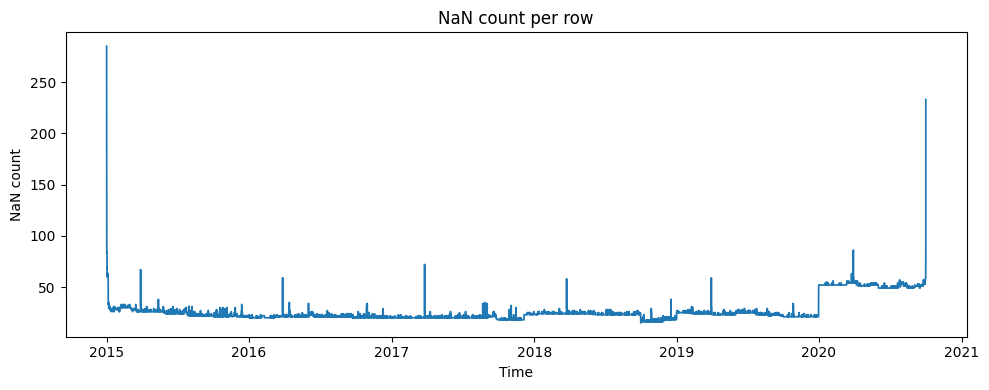

In [34]:
import matplotlib.pyplot as plt
from pathlib import Path
import sys, importlib

PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src import eda_utils
importlib.reload(eda_utils)
from src import plotting_utils
importlib.reload(plotting_utils)



fig, ax = plotting_utils.plot_nan_count(missingness_summary_df, time_col="utc_timestamp", use_existing_col="nan_count", title="NaN count per row")

plt.show()


<h3> Missingness Plots </h3>

c:\Users\flosk\Documents\GitHub\electricity-demand-project\src\eda_utils.py:178: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[col] = df[col].isna().astype("float64")
c:\Users\flosk\Documents\GitHub\electricity-demand-project\src\eda_utils.py:178: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[col] = df[col].isna().astype("float64")
c:\Users\flosk\Documents\GitHub\electricity-demand-project\src\eda_utils.py:178: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

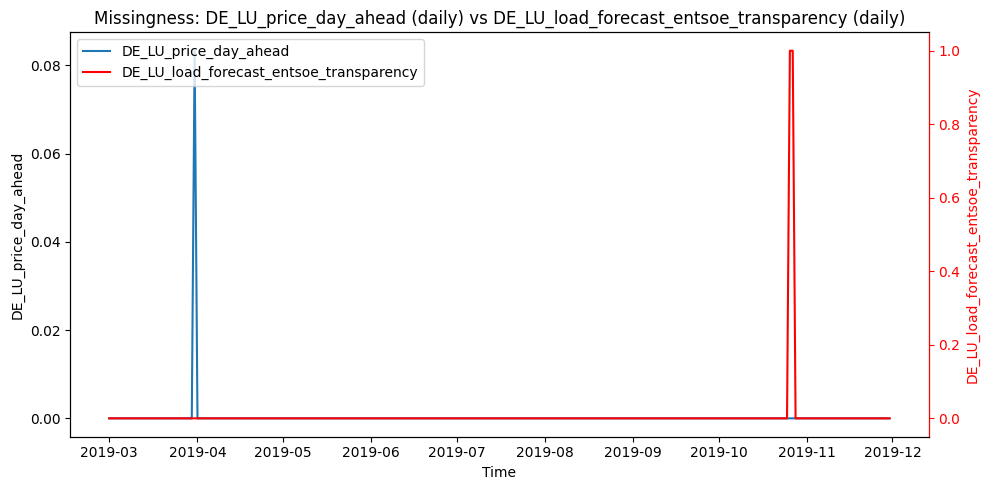

In [ ]:
# --- Missingness dual-plot with red second y-axis ---
from pathlib import Path
import sys, importlib
import pandas as pd
import matplotlib.pyplot as plt
import warnings
# Ensure we can import from src/
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src import eda_utils, plotting_utils
importlib.reload(eda_utils)
importlib.reload(plotting_utils)

# 1) Build missingness mask (preserve timestamp cols)
mask_df = eda_utils.missingness_mask(
    OPSD_60min_df,
    time_cols=("utc_timestamp", "cet_cest_timestamp")
)

# 2) Make a tz-aware UTC DatetimeIndex from utc_timestamp
mask_df_idx = mask_df.copy()
if "utc_timestamp" in mask_df_idx.columns:
    idx = pd.to_datetime(mask_df_idx["utc_timestamp"], utc=True)
    mask_df_idx = mask_df_idx.set_index(idx).drop(columns=["utc_timestamp"])
else:
    mask_df_idx.index = pd.to_datetime(mask_df_idx.index, utc=True)

# 3) tz-aware slice window
start = pd.Timestamp("2019-03-01", tz="UTC")
end   = pd.Timestamp("2019-11-30 23:59:59", tz="UTC")


    
# 4) Plot; coverage_threshold is keyword-only in aggregate_timeseries (and forwarded correctly)
fig, ax1, ax2 = plotting_utils.plot_dual_timeseries(
    mask_df_idx,
    start_date=start,
    end_date=end,
    column_name_one="DE_LU_price_day_ahead",
    granularity_one="D",
    column_name_two="DE_LU_load_forecast_entsoe_transparency",
    granularity_two="D",
    time_col="cet_cest_timestamp",   # or "utc_timestamp" if you prefer; your df has both
    coverage_threshold=0.5,
    title="Missingness: DE_LU_price_day_ahead (daily) vs DE_LU_load_forecast_entsoe_transparency (daily)",
)

# 5) Ensure right axis is red (the function already does this, but keeping for emphasis)
for ln in ax2.lines:
    ln.set_color("red")
ax2.tick_params(axis="y", colors="red")
ax2.spines["right"].set_color("red")
ax2.yaxis.label.set_color("red")

plt.show()


<h2>Select Columns Relevant for Germany into Derived DataFrames</h2>

🇩🇪 We select the Germany-related columns and the two timestamp columns into a sub-frame: 

In [ ]:
germany_cols = [col for col in OPSD_60min_df.columns if col.startswith("DE_") or "timestamp" in col]
OPSD_60min_de_df = OPSD_60min_df[germany_cols].copy()

In [ ]:
OPSD_60min_de_df.head(5)

,utc_timestamp,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
0,2014-12-31 23:00:00+00:00,2015-01-01 00:00:00+01:00,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+01:00,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,...,13841.0,13362.0,NaN,3866.0,469.0,3398.0,5307.0,4703.0,NaN,5.0
2,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+01:00,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,...,13267.0,12858.0,NaN,3974.0,466.0,3508.0,5087.0,4562.0,NaN,7.0
3,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+01:00,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,...,12702.0,12611.0,NaN,4194.0,470.0,3724.0,4906.0,4517.0,NaN,8.0
4,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+01:00,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,...,12452.0,12490.0,NaN,4446.0,473.0,3973.0,4865.0,4601.0,NaN,11.0


🇩🇪 $+$ 🇱🇺 Since Luxembourg and Germany form one bidding zone, it might be beneficial to include the (two) Luxembourg columns as well.

In [ ]:
germany_lux_cols = [col for col in OPSD_60min_df.columns if col.startswith("DE_") or col.startswith("LU_") or  "timestamp" in col]
OPSD_60min_de_lu_df = OPSD_60min_df[germany_lux_cols].copy()

We have $45$ columns now. 

In [ ]:
OPSD_60min_de_lu_df.shape

(50401, 45)

In [ ]:
OPSD_60min_de_lu_df.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile',
       'DE_50hertz_load_actual_entsoe_transparency',
       'DE_50hertz_load_forecast_entsoe_transparency',
       'DE_50hertz_solar_generation_actual',
       'DE_50hertz_wind_generation_actual',
       'DE_50hertz_wind_offshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_actual',
       'DE_LU_load_actual_entsoe_transparency',
       'DE_LU_load_forecast_entsoe_transparency', 'DE_LU_price_day_ahead',
       'DE_LU_solar_generation_actual', 'DE_LU_wind_generation_actual',
    

Here is a view of the columns grouped by prefixes.  

`50hertz`,`amprion` ,`tennet` and `transnetbw` refer to the  transmission system operators (TOS) currently operating in Germany.  Only the last one, `transnetbw`, has a control area that matches one federal state:  **Baden-Württemberg**.  The control area of `50hertz` contains the former **GDR**'s territory, the whole of  the city state **Berlin** and, in addition, the city state of **Hamburg**.  The control areas of `amprion` and `tennet` do not align well with the federal subdivision.  

| **Group**          | **Columns** |
|---------------------|-------------|
| **DE_LU** | `DE_LU_load_actual_entsoe_transparency`, `DE_LU_load_forecast_entsoe_transparency`, `DE_LU_price_day_ahead`, `DE_LU_solar_generation_actual`, `DE_LU_wind_generation_actual`, `DE_LU_wind_offshore_generation_actual`, `DE_LU_wind_onshore_generation_actual` |
| **DE** | `DE_load_actual_entsoe_transparency`, `DE_load_forecast_entsoe_transparency`, `DE_solar_capacity`, `DE_solar_generation_actual`, `DE_solar_profile`, `DE_wind_capacity`, `DE_wind_generation_actual`, `DE_wind_profile`, `DE_wind_offshore_capacity`, `DE_wind_offshore_generation_actual`, `DE_wind_offshore_profile`, `DE_wind_onshore_capacity`, `DE_wind_onshore_generation_actual`, `DE_wind_onshore_profile` |
| **LU** | `LU_load_actual_entsoe_transparency`, `LU_load_forecast_entsoe_transparency` |
| **DE_50hertz** | `DE_50hertz_load_actual_entsoe_transparency`, `DE_50hertz_load_forecast_entsoe_transparency`, `DE_50hertz_solar_generation_actual`, `DE_50hertz_wind_generation_actual`, `DE_50hertz_wind_offshore_generation_actual`, `DE_50hertz_wind_onshore_generation_actual` |
| **DE_amprion** | `DE_amprion_load_actual_entsoe_transparency`, `DE_amprion_load_forecast_entsoe_transparency`, `DE_amprion_solar_generation_actual`, `DE_amprion_wind_onshore_generation_actual` |
| **DE_tennet** | `DE_tennet_load_actual_entsoe_transparency`, `DE_tennet_load_forecast_entsoe_transparency`, `DE_tennet_solar_generation_actual`, `DE_tennet_wind_generation_actual`, `DE_tennet_wind_offshore_generation_actual`, `DE_tennet_wind_onshore_generation_actual` |
| **DE_transnetbw** | `DE_transnetbw_load_actual_entsoe_transparency`, `DE_transnetbw_load_forecast_entsoe_transparency`, `DE_transnetbw_solar_generation_actual`, `DE_transnetbw_wind_onshore_generation_actual` |


<h2> Data Completeness and NaN Analysis for <code> OPSD_60min_de_lu_df  </code> </h2>

In [ ]:
# --- NaN stats → sort → tidy DataFrame (OPSD_60min_df) ---
from pathlib import Path
import sys, importlib
from IPython.display import display

# import module
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src import eda_utils
importlib.reload(eda_utils)  # pick up latest edits

df = globals().get("OPSD_60min_de_lu_df")
if df is None:
    print("No DataFrame named OPSD_60min_de_lu_df found. Load it first by running the preceding cells, then re-run this cell again, please.")
else:
    # Call with ONLY the df (all other args are keyword-only and optional)
    opsd_60min_de_lu_nan_desc_lst, opsd_60min_de_lu_nan_df = eda_utils.build_nan_stats(df)

    print(f"Columns analyzed: {len(opsd_60min_de_lu_nan_df)}")
    print("\nTop 20 by relative NaNs:\n")
    display(opsd_60min_de_lu_nan_df.head(45))  
    


Columns analyzed: 45

Top 20 by relative NaNs:



,column,n_missing,frac_missing
0,DE_LU_load_forecast_entsoe_transparency,33745,0.669530
1,DE_LU_load_actual_entsoe_transparency,32877,0.652308
2,DE_LU_solar_generation_actual,32862,0.652011
3,DE_LU_price_day_ahead,32861,0.651991
4,DE_LU_wind_generation_actual,32855,0.651872
5,DE_LU_wind_offshore_generation_actual,32855,0.651872
6,DE_LU_wind_onshore_generation_actual,32855,0.651872
7,DE_solar_profile,6705,0.133033
8,DE_wind_profile,6676,0.132458
9,DE_wind_offshore_profile,6676,0.132458


All `load_actual` columns have only one NaN. We have a closer look where they occur:

In [ ]:

load_actual_cols = [
    "DE_load_actual_entsoe_transparency",
    "DE_transnetbw_load_actual_entsoe_transparency",
    "DE_tennet_load_actual_entsoe_transparency",
    "DE_amprion_load_actual_entsoe_transparency",
    "DE_50hertz_load_actual_entsoe_transparency",
]
at_least_one_nan_mask = OPSD_60min_de_lu_df[load_actual_cols].isna().any(axis=1)
OPSD_60min_de_lu_actual_nan_df = OPSD_60min_de_lu_df.loc[at_least_one_nan_mask]
display(OPSD_60min_de_lu_actual_nan_df)

,utc_timestamp,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,...,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual,LU_load_actual_entsoe_transparency,LU_load_forecast_entsoe_transparency
0,2014-12-31 23:00:00+00:00,2015-01-01 00:00:00+01:00,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All German `load_actual` NaN values appear in the very first row of the DataFrame. This row consists almost entirely of NaN values. Which indicates that, although the dataset begins at local midnight, data recording only started from **UTC midnight** on New Year’s Day.

<h2> Export <code>OPSD_60min_de_lu_df</code>  to Parquet  (<code>data/processed/</code>)</h2>

In [ ]:
from src.persist import save_parquet
p=save_parquet(OPSD_60min_de_lu_df,   name="OPSD_60min_de_lu_df", allow_overwrite = True)
print(f"OPSD_60min_de_lu_df has been saved to {p}")